<a href="https://colab.research.google.com/github/SherifShawky01/ITI_Work/blob/main/polynomial_regression/Polynomial_regression_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 358, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 358 (delta 59), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (358/358), 42.64 MiB | 7.32 MiB/s, done.
Resolving deltas: 100% (182/182), done.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

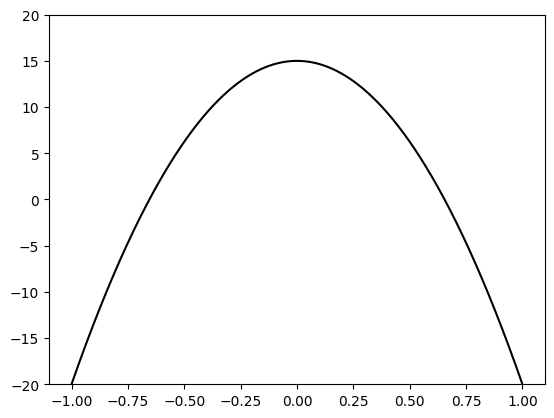

In [3]:
# Our original polynomial is -35x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [5]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

X=X.reshape(-1,1)

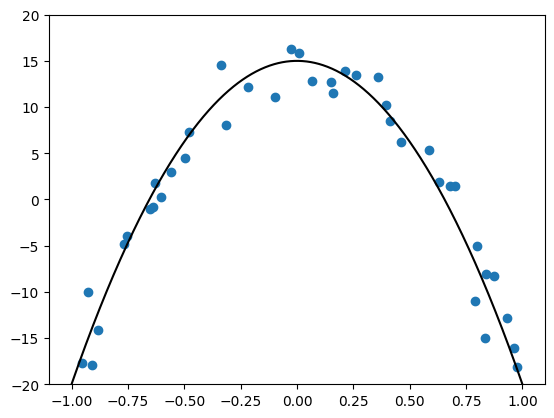

In [6]:
plt.scatter(X, Y)

draw_polynomial(coefs)


## Training a polynomial regression model

In [7]:
for datasample in zip(X,Y):
    print(datasample)

(array([0.79634624]), -4.987021692199473)
(array([-0.2174079]), 12.186494719897935)
(array([0.4105668]), 8.51416927556333)
(array([0.69897193]), 1.5074515503972998)
(array([0.79007793]), -10.981245193989203)
(array([0.15939002]), 11.49489831282274)
(array([-0.09887379]), 11.083923326370371)
(array([0.83388244]), -14.98842561565315)
(array([0.58665017]), 5.348645335503234)
(array([-0.0271116]), 16.33736440541925)
(array([0.26029468]), 13.468136581792084)
(array([0.46297844]), 6.263787056401539)
(array([-0.76573141]), -4.865413486859145)
(array([-0.3349277]), 14.571036079808291)
(array([0.63182619]), 1.935578622920234)
(array([0.39534128]), 10.194498032910282)
(array([-0.90953186]), -17.878582370333618)
(array([0.06839594]), 12.871533693282515)
(array([0.36117827]), 13.233922750329933)
(array([0.21267684]), 13.890972539019417)
(array([0.1519059]), 12.701365741671829)
(array([0.9610333]), -16.11098183885502)
(array([-0.92721592]), -10.042445117093663)
(array([-0.63005612]), 1.796552020552

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [8]:
from sklearn.preprocessing import PolynomialFeatures

def addPoly(X,polyDegree):
    ## TODO##
    poly=PolynomialFeatures(degree=polyDegree,include_bias=False)
    #use sklearn (PolynomialFeatures method)
    X=poly.fit_transform(X)
    return X
X_poly=addPoly(X,200)


In [9]:
X_poly.shape

(40, 200)

In [10]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[7.96346243e-01 6.34167338e-01 5.05016777e-01 4.02168213e-01
 3.20265145e-01 2.55041945e-01 2.03101695e-01 1.61739272e-01
 1.28800461e-01 1.02569763e-01 8.16810456e-02 6.50463938e-02
 5.17994513e-02 4.12502984e-02 3.28495202e-02 2.61595919e-02
 2.08320928e-02 1.65895588e-02 1.32110328e-02 1.05205563e-02
 8.37800552e-03 6.67179321e-03 5.31305746e-03 4.23103334e-03
 3.36936751e-03 2.68318315e-03 2.13674282e-03 1.70158712e-03
 1.35505251e-03 1.07909097e-03 8.59330043e-04 6.84324251e-04
 5.44959046e-04 4.33976089e-04 3.45595228e-04 2.75213461e-04
 2.19165206e-04 1.74531388e-04 1.38987415e-04 1.10682106e-04
 8.81412791e-05 7.01909764e-05 5.58963204e-05 4.45128247e-05
 3.54476207e-05 2.82285796e-05 2.24797233e-05 1.79016432e-05
 1.42559063e-05 1.13526374e-05 9.04063014e-06 7.19947184e-06
 5.73327235e-06 4.56566989e-06 3.63585407e-06 2.89539872e-06
 2.30573990e-06 1.83616730e-06 1.46222493e-06 1.16443733e-06
 9.27295293e-07 7.38448123e-07 5.88060388e-07 4.68299680e-07
 3.72928691e-0

## Splitting data into training and testing

In [11]:
from sklearn.model_selection import train_test_split
## TODO ##

# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test =train_test_split(X_poly,Y,train_size=0.8,random_state=42)
print(X_train.shape,X_test.shape,Y.shape,y_test.shape)

(32, 200) (8, 200) (40,) (8,)


In [12]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [13]:
from sklearn.linear_model import LinearRegression
## TODO ##
# print(X.reshape(-1,1))
# print(Y.reshape(-1,1))
# use sklearn linear regression to fit the data
model=LinearRegression()
model_no_reg =model.fit(X_train,y_train)

Training error (rmse): 0.0012113048806221278
Testing error (rmse): 1825340555.4131413


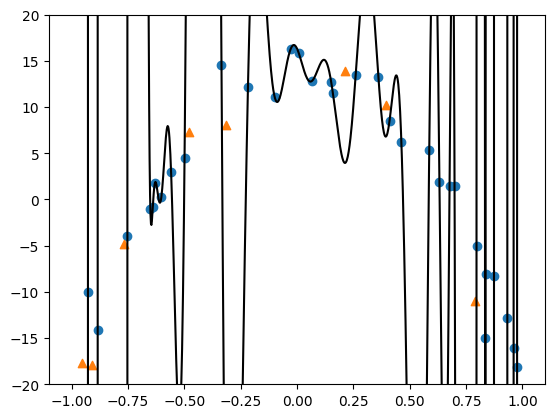

Polynomial coefficients
[16.339493203477293, -51.69800214559483, -1513.5143871365376, 20343.39459893855, 163063.75302449075, -1886598.6915562858, -5302472.230236231, 62334183.85350833, 67509945.08175865, -971367052.5871675, -349351461.3899537, 8287235207.299756, 176559008.57523587, -41510554820.3723, 5642026668.482832, 122963290301.82004, -23080815133.268543, -198624662253.36148, 29464870970.605534, 114412987622.89224, 15737162469.4175, 92063783286.32478, -48210975441.65281, -78003302245.34404, -25654912522.433025, -93709652962.29839, 38391635304.85311, -895262247.931975, 56703328316.18535, 66588846806.48725, 18240254195.243782, 63653625658.05001, -34400391409.74271, 20377619627.745663, -61795073659.60162, -20773610807.28028, -52875569351.25067, -38418135832.22785, -19439173312.963818, -33395947219.186092, 19207407568.01896, -17089911005.645536, 47796625664.409996, -937473358.4748195, 59413012659.34082, 8489779900.728917, 54587512616.5013, 9847517737.747162, 38241274181.65461, 52157113

In [14]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [18]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data

model_L1_reg =linear_model.Lasso().fit(X_train,y_train)

Training error (rmse): 3.9739764672576596
Testing error (rmse): 5.698242410209453


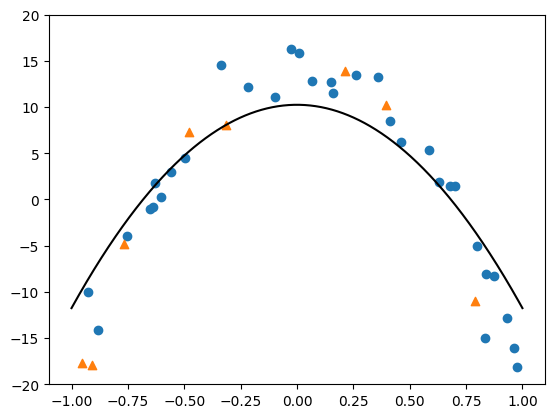

Polynomial coefficients
[10.248162061200118, -0.0, -22.00607851158939, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0,

In [19]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [20]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data

model_L2_reg =linear_model.Ridge().fit(X_train,y_train)

Training error (rmse): 3.0974731378762876
Testing error (rmse): 4.216264343494259


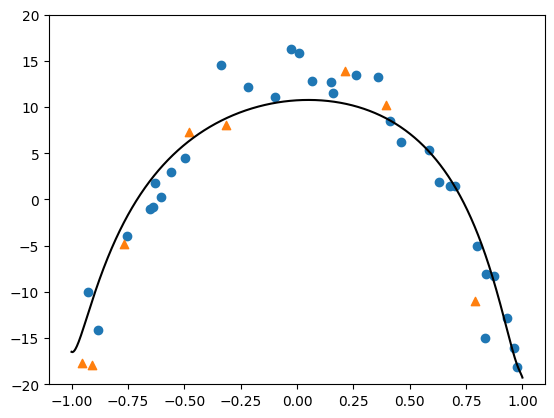

Polynomial coefficients
[10.7346145009714, 1.4771025237076802, -14.412819151257999, -0.7171509002748095, -8.439873955938063, -1.0042414224644127, -4.802633814002093, -0.7935156608462042, -2.718997880855693, -0.5084106473596947, -1.4837769768846205, -0.27262787386867277, -0.729131876736474, -0.10689150301360828, -0.26202690586376987, -0.0011003327015414177, 0.02558265765399037, 0.06070106612183024, 0.1980942695761131, 0.09265303370310068, 0.2957916798772177, 0.10543775824222162, 0.3447267481099296, 0.10654296875319252, 0.3621055446837883, 0.10098037835869367, 0.35942747368800343, 0.09198519100993252, 0.34441605942855646, 0.08157280567730951, 0.32225509107192674, 0.07094638048001745, 0.2964027844485164, 0.06078213804110602, 0.26913852662223625, 0.05142340048098365, 0.2419348623551645, 0.04300966546299348, 0.21571276877795256, 0.03556077070741717, 0.19101779302740057, 0.029030637714311858, 0.16814195797442338, 0.023340754640756772, 0.1472082245526224, 0.018400379000416467, 0.1282289658000

In [21]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [22]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,0.212677,13.890973,3.952140e+00,9.252796,10.371773
1,-0.909532,-17.878582,8.751309e+07,-7.956327,-11.054493
2,0.395341,10.194498,6.821548e+00,6.808728,8.784309
3,-0.954435,-17.709206,-5.162101e+09,-9.798185,-14.452907
4,0.790078,-10.981245,-1.081915e+03,-3.488541,-3.044810
5,-0.765731,-4.865413,-8.271875e+04,-2.654983,-2.400876
6,-0.315375,8.062151,-4.520166e+01,8.059408,8.772648
7,-0.480160,7.347497,6.879505e+01,5.174576,6.296666


### Real Example (Predict fuel efficiency)

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [25]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### using 50th order

In [26]:
from sklearn import preprocessing

X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X

X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)
scaler=preprocessing.StandardScaler().fit(X_trainPoly)

X_trainPoly=scaler.transform(X_trainPoly)
X_testPoly=scaler.transform(X_testPoly)

##### no regularization

In [27]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3062.8548221856595


##### lasso regularization

In [28]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.5)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.383251699910778


##### ridge regularization

In [29]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.5)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.210997782920175
